In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive') # para conectar con drive

Mounted at /content/drive


## subida de todos los datos

In [3]:
os.chdir (r'/content/drive/MyDrive/labo 4/ferro original/medicion nitrogeno 3 en S2') # ruta del archivo

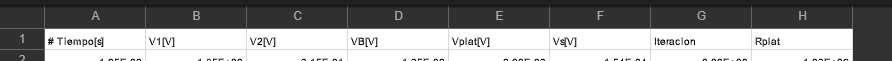

In [4]:
archivos = os.listdir()
csv_files = [archivo for archivo in archivos if archivo.endswith('.csv')]  # Filtrar solo archivos CSV

# Diccionario para almacenar los datos de cada archivo
datos = {}

# Leer cada archivo y guardar en listas
for archivo in csv_files:
    df = pd.read_csv(archivo, delimiter=',')
    datos[archivo] = {
        "Tiempo": df["# Tiempo[s]"].tolist(),
        "V1": df["V1[V]"].tolist(),
        "V2": df["V2[V]"].tolist(),
        "VB": df["VB[V]"].tolist()
        }

#       "Vplat": df["Vplat[V]"].tolist(),
 #       "Vs": df["Vs[V]"].tolist(),
  #      "iteracion": df["Iteracion"].tolist(),
   #     "Rplat": df["Rplat"].tolist()

In [5]:
print(df.columns)

Index(['# Tiempo[s]', 'V1[V]', 'V2[V]', 'VB[V]', ' Vplat[V]', ' Vs[V]',
       ' Iteracion', ' Rplat'],
      dtype='object')


### renombro los archivos para poder acceder mas facil a ellos (no importa)

In [6]:
#print("Archivos cargados:", datos.keys())

datos_numerados = {i: valores for i, (archivo, valores) in enumerate(datos.items())}

print("Conversión de nombres:")
for i, nombre in enumerate(datos.keys()):
    print(f"{i} -> {nombre}")

Conversión de nombres:
0 -> Medicion_nitrogeno3enS20.csv
1 -> Medicion_nitrogeno3enS21.csv
2 -> Medicion_nitrogeno3enS23.csv
3 -> Medicion_nitrogeno3enS22.csv
4 -> Medicion_nitrogeno3enS210.csv
5 -> Medicion_nitrogeno3enS27.csv
6 -> Medicion_nitrogeno3enS25.csv
7 -> Medicion_nitrogeno3enS24.csv
8 -> Medicion_nitrogeno3enS26.csv
9 -> Medicion_nitrogeno3enS29.csv
10 -> Medicion_nitrogeno3enS28.csv
11 -> Medicion_nitrogeno3enS216.csv
12 -> Medicion_nitrogeno3enS211.csv
13 -> Medicion_nitrogeno3enS213.csv
14 -> Medicion_nitrogeno3enS212.csv
15 -> Medicion_nitrogeno3enS214.csv
16 -> Medicion_nitrogeno3enS215.csv
17 -> Medicion_nitrogeno3enS218.csv
18 -> Medicion_nitrogeno3enS217.csv
19 -> Medicion_nitrogeno3enS222.csv
20 -> Medicion_nitrogeno3enS221.csv
21 -> Medicion_nitrogeno3enS220.csv
22 -> Medicion_nitrogeno3enS219.csv
23 -> Medicion_nitrogeno3enS226.csv
24 -> Medicion_nitrogeno3enS223.csv
25 -> Medicion_nitrogeno3enS224.csv
26 -> Medicion_nitrogeno3enS227.csv
27 -> Medicion_nitrogeno3

In [7]:
# para acceder:
print(datos_numerados[0]["Tiempo"][:5])  # Primeros 5 valores del primer archivo

[0.019531726837158203, 0.01955176310105757, 0.019571799364956944, 0.019591835628856313, 0.01961187189275568]


## histeresis

In [8]:
for i in range(len(datos_numerados)):  # Iterar sobre los archivos numerados
    plt.figure(figsize=(6, 4))  # Tamaño de cada figura

    # Graficar V1 vs V2
    plt.scatter(datos_numerados[i]["V1"], datos_numerados[i]["V2"], label=f"Archivo {i}", s=10, alpha=0.7)

    # Configuración del gráfico
    plt.xlabel("V1 [V]")
    plt.ylabel("V2 [V]")
    plt.title(f"Gráfico V1 vs V2 - Archivo {i}")
    plt.legend()
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

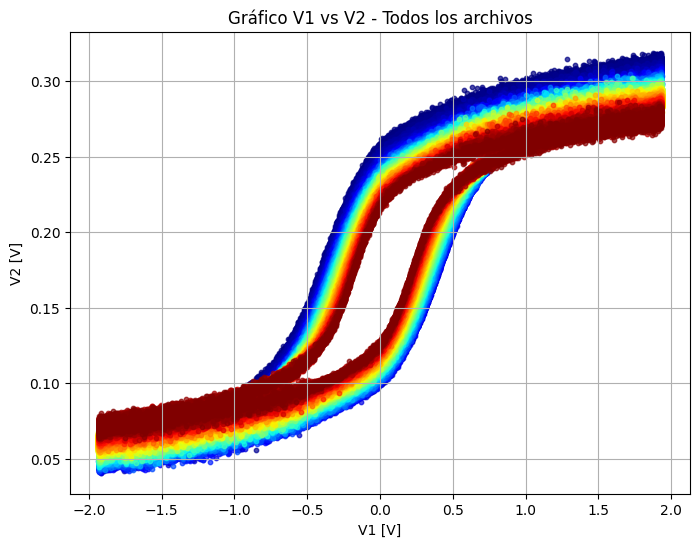

In [ ]:
# ahora todo junto

colores = plt.cm.jet(np.linspace(0, 1, len(datos_numerados)))

plt.figure(figsize=(8, 6))  # Crear figura

# Iterar sobre los archivos y graficar en el mismo gráfico
for i, color in zip(range(len(datos_numerados)), colores):
    plt.scatter(datos_numerados[i]["V1"], datos_numerados[i]["V2"],
                color=color, s=10, alpha=0.7)

# Configuración del gráfico
plt.xlabel("V1 [V]")
plt.ylabel("V2 [V]")
plt.title("Gráfico V1 vs V2 - Todos los archivos")
plt.grid(True)

# Mostrar el gráfico sin la leyenda
plt.show()

## areas de histeresis

### prueba con la lib hysteresis

In [ ]:
i = 0

V1 = np.array(datos_numerados[i]["V1"])
V2 = np.array(datos_numerados[i]["V2"])

# Ordenar los datos en función de V1
indices_ordenados = np.argsort(V1)
V1_ordenado = V1[indices_ordenados]
V2_ordenado = V2[indices_ordenados]

# Calcular el área con la regla del trapecio
area = np.trapz(V2_ordenado, V1_ordenado)

# Mostrar el resultado
print(f"Área bajo la curva para el archivo {i}: {area:.4f}")

#no se no confio

Área bajo la curva para el archivo 0: 0.7104


In [ ]:
#pruebo algo nuevo : https://pypi.org/project/hysteresis/
!pip install hysteresis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade hysteresis

In [ ]:
import hysteresis as hys

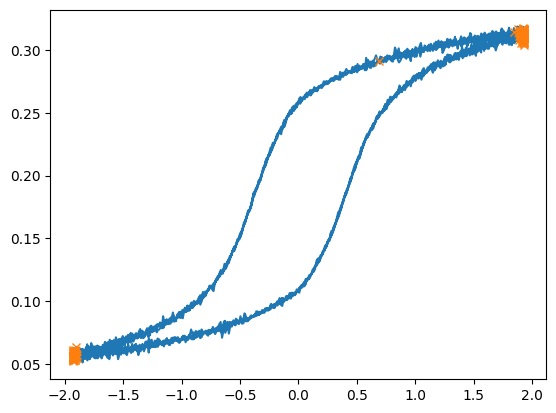

In [ ]:
xy = np.column_stack([V1,V2])
myHys = hys.Hysteresis(xy)
myHys.plot(showReversals = True) # puntos naranja: cuando la curva pasa de aumentar a disminuir o viceversa


In [ ]:
area = myHys.area
netArea = myHys.getNetArea()
cumulativeArea = myHys.getCumArea()
#slope = DamperHys.slope

print(f"Area: {area}") # esto te devvuelve el area por cada segmento i , i+1, ...
print(f"Net Area: {netArea}") # es la suma total de todos los incrementos
print(f"Cumulative Area: {cumulativeArea}") #  a1, a1+a2, ... --> el ultimo valor tiene que coincidir con el net area
#print(f"Slope: {slope}")

Area: [ 0.00046386  0.00072211  0.000515   ... -0.00364553 -0.00359653
 -0.0017748 ]
Net Area: -1.0539209621539567
Cumulative Area: [ 4.63862779e-04  1.18596843e-03  1.70096553e-03 ... -1.04854964e+00
 -1.05214617e+00 -1.05392096e+00]


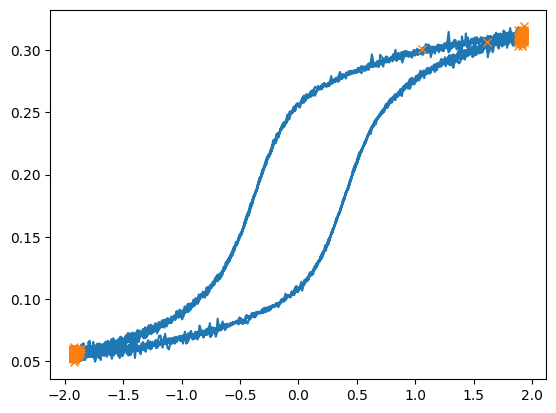

In [ ]:
i1 = 1

V1_1 = np.array(datos_numerados[i1]["V1"])
V2_1 = np.array(datos_numerados[i1]["V2"])

xy1 = np.column_stack([V1_1,V2_1])
myHys = hys.Hysteresis(xy1)
myHys.plot(showReversals = True)

In [ ]:

resultados_area = {}  # Diccionario para guardar los resultados

for nombre_archivo, valores in datos.items():
    # Extraer V1 y V2 (o la señal que te interese para el lazo)
    x = np.array(valores["V1"])
    y = np.array(valores["V2"])

    # Crear la matriz xy
    xy = np.column_stack((x, y))

    # Crear objeto de histéresis y calcular área
    myHys = hys.Hysteresis(xy)

    # Área neta (puede ser positiva o negativa según el sentido)
    area = myHys.area  # .area suele dar la integral "net" con signo
    netArea = myHys.getNetArea()
    # Área por segmentos e integración acumulada
    # (si quieres más detalle)
    areas_segmentos = myHys.getCumArea()  # array con la suma acumulada
    area_final_acumulada = areas_segmentos[-1]  # último valor del array

    # Guardar resultados
    resultados_area[nombre_archivo] = {
        "netArea": netArea,
        "CumulativeAreaArray": areas_segmentos,
        "FinalCumulativeArea": area_final_acumulada
    }

# 3) Mostrar o usar los resultados
for archivo, resultado in resultados_area.items():
    print(f"\nArchivo: {archivo}")
    print(f"  - Área neta: {resultado['netArea']}")
    print(f"  - Último valor de área acumulada: {resultado['FinalCumulativeArea']}")
    # Si quieres ver la lista completa de área acumulada
    # print("  - Array completo:", resultado["CumulativeAreaArray"])


Archivo: Medicion_nitrogeno3enS20.csv
  - Área neta: -1.0539209621539567
  - Último valor de área acumulada: -1.0539209621539616

Archivo: Medicion_nitrogeno3enS21.csv
  - Área neta: -0.706847908400185
  - Último valor de área acumulada: -0.7068479084001843

Archivo: Medicion_nitrogeno3enS23.csv
  - Área neta: -1.295677654226712
  - Último valor de área acumulada: -1.295677654226711

Archivo: Medicion_nitrogeno3enS22.csv
  - Área neta: -1.306361317689229
  - Último valor de área acumulada: -1.3063613176892253

Archivo: Medicion_nitrogeno3enS210.csv
  - Área neta: -1.0490301873384347
  - Último valor de área acumulada: -1.049030187338433

Archivo: Medicion_nitrogeno3enS27.csv
  - Área neta: -0.49818601688030745
  - Último valor de área acumulada: -0.4981860168803053

Archivo: Medicion_nitrogeno3enS25.csv
  - Área neta: -0.2604037857854051
  - Último valor de área acumulada: -0.2604037857854042

Archivo: Medicion_nitrogeno3enS24.csv
  - Área neta: -1.3406167140875151
  - Último valor de

In [ ]:
import re

def extraer_numero(archivo):
    # Busca algo como "Medicion_nitrogeno3enS2<digitos>.csv"
    patron = r"Medicion_nitrogeno3enS2(\d+)\.csv$"
    match = re.search(patron, archivo)
    if match:
        # Convierte el grupo 1 a entero
        return int(match.group(1))
    else:
        # Si no coincide, devuelves algo muy grande
        return float('inf')

# Suponiendo que `resultados_area` es tu diccionario con nombre -> resultados
resultados_list = []
for archivo in sorted(resultados_area.keys(), key=extraer_numero):
    resultado = resultados_area[archivo]
    net_area = resultado["netArea"]
    final_area = resultado["FinalCumulativeArea"]
    abs_net_area = abs(net_area)

    resultados_list.append({
        "Archivo": archivo,
        "NetArea": net_area,
        "FinalCumulativeArea": final_area,
        "AbsNetArea": abs_net_area
    })

# Luego lo guardas en CSV
import pandas as pd
df_resultados = pd.DataFrame(resultados_list)
df_resultados.to_csv("resultados_areaFINAL.csv", index=False)
print("Resultados guardados en 'resultados_areaFINAL.csv'.")

Resultados guardados en 'resultados_areaFINAL.csv'.


In [ ]:
for item in resultados_list:
    print(item['NetArea'])

-1.0539209621539567
-0.706847908400185
-1.306361317689229
-1.295677654226712
-1.3406167140875151
-0.2604037857854051
-0.3152696132542109
-0.49818601688030745
-0.9523239490113963
-1.2548203678480745
-1.0490301873384347
-0.2894106446568317
-1.3239684490567698
-1.1807510100707157
-0.25209292110915377
-0.8044843373493813
-1.227823535851761
-1.14833721352086
-0.7145682616226368
-0.533973084917649
-0.7691299619287301
-0.6295188282007076
-0.4919049112169425
-0.43613842729922137
-0.8495051726441749
-0.6120467321411597
-0.7770628221139159
-0.43299227425343123
-0.7071356972292937
-0.632024678296033
-0.17345755883146508
-0.262056478039223
-0.8004581514593812
-0.6133104590398425
-0.5411858058054206
-0.7770019346888744
-0.6541126723443077
-0.09827914988547287
-0.9493625388286713
-0.5906155845828951
-1.326812083626871
-0.8619545944856959
-0.13275076028089883
-0.1693650599246448
-0.8971456059511219
-1.275340855328489
-0.16456209824936296
-1.237560801119675
-0.38469009129438075
-0.8094581439686348
-1.

### metodo regla del trapecio

In [8]:
def calcular_area(x, y):
    return np.trapz(y, x)

# Diccionario para almacenar las áreas de cada archivo
areas = {}

# Calcular el área para cada archivo
for i in range(len(datos_numerados)):
    V1 = datos_numerados[i]["V1"]
    V2 = datos_numerados[i]["V2"]

    # Calcular el área bajo la curva V1 vs V2
    area = calcular_area(V1, V2)
    areas[i] = area

    print(f"Área bajo la curva del archivo {i}: {area}")

# Mostrar las áreas calculadas
print("Áreas calculadas:", areas)

Área bajo la curva del archivo 0: -1.0539209621539571
Área bajo la curva del archivo 1: -0.7068479084001852
Área bajo la curva del archivo 2: -1.2956776542267123
Área bajo la curva del archivo 3: -1.306361317689229
Área bajo la curva del archivo 4: -1.0490301873384347
Área bajo la curva del archivo 5: -0.4981860168803072
Área bajo la curva del archivo 6: -0.26040378578540513
Área bajo la curva del archivo 7: -1.3406167140875151
Área bajo la curva del archivo 8: -0.31526961325421066
Área bajo la curva del archivo 9: -1.2548203678480743
Área bajo la curva del archivo 10: -0.9523239490113962
Área bajo la curva del archivo 11: -1.227823535851761
Área bajo la curva del archivo 12: -0.2894106446568318
Área bajo la curva del archivo 13: -1.1807510100707157
Área bajo la curva del archivo 14: -1.32396844905677
Área bajo la curva del archivo 15: -0.25209292110915354
Área bajo la curva del archivo 16: -0.8044843373493813
Área bajo la curva del archivo 17: -0.7145682616226364
Área bajo la curva de

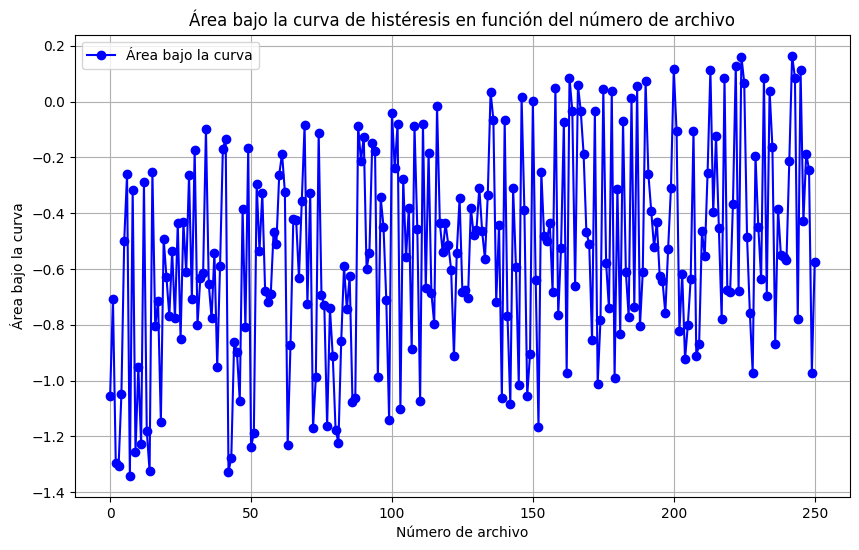

In [9]:
archivos = list(areas.keys())
areas_calculadas = list(areas.values())

# Graficar el área en función del número de archivo
plt.figure(figsize=(10, 6))
plt.plot(archivos, areas_calculadas, marker='o', linestyle='-', color='b', label="Área bajo la curva")

# Configuración del gráfico
plt.xlabel("Número de archivo")
plt.ylabel("Área bajo la curva")
plt.title("Área bajo la curva de histéresis en función del número de archivo")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

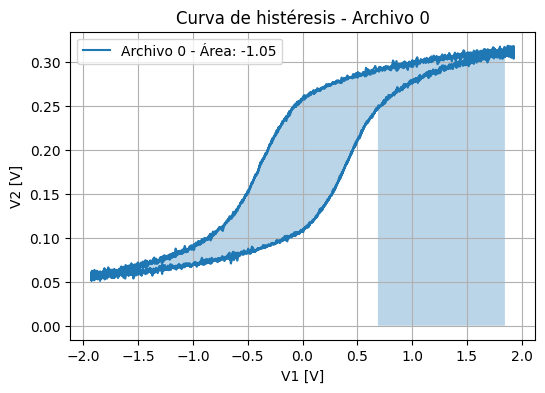

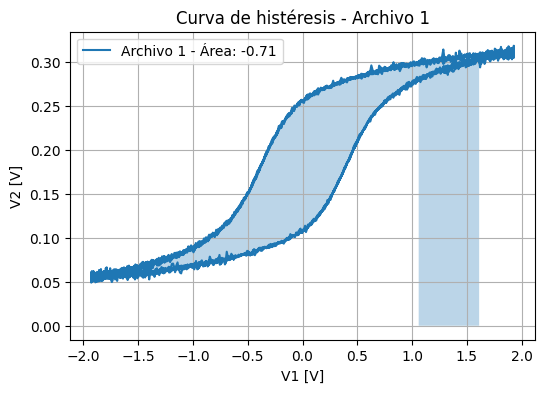

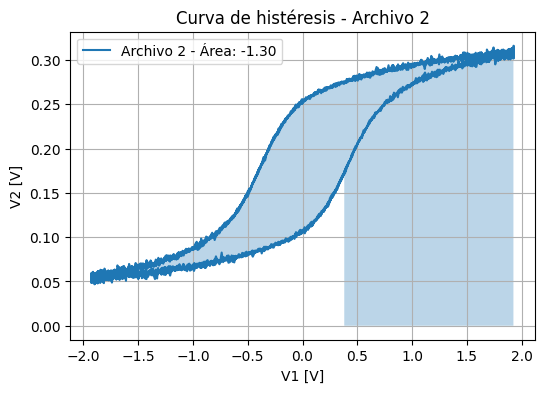

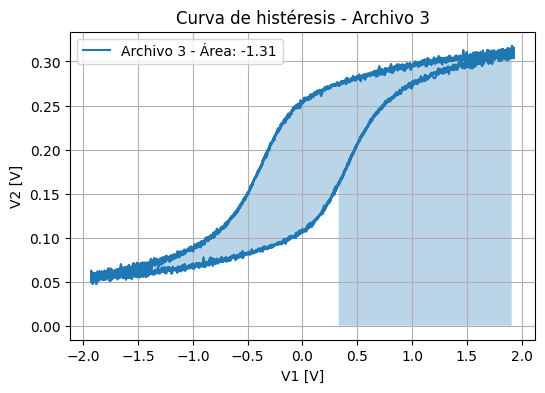

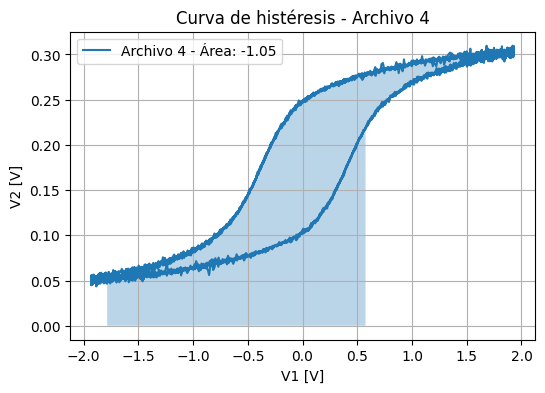

In [10]:
for i in range(0,5):
    V1 = datos_numerados[i]["V1"]
    V2 = datos_numerados[i]["V2"]

    # Calcular el área
    area = calcular_area(V1, V2)

    # Graficar la curva
    plt.figure(figsize=(6, 4))
    plt.plot(V1, V2, label=f"Archivo {i} - Área: {area:.2f}")
    plt.fill_between(V1, V2, alpha=0.3)  # Rellenar el área bajo la curva
    plt.xlabel("V1 [V]")
    plt.ylabel("V2 [V]")
    plt.title(f"Curva de histéresis - Archivo {i}")
    plt.legend()
    plt.grid(True)
    plt.show()

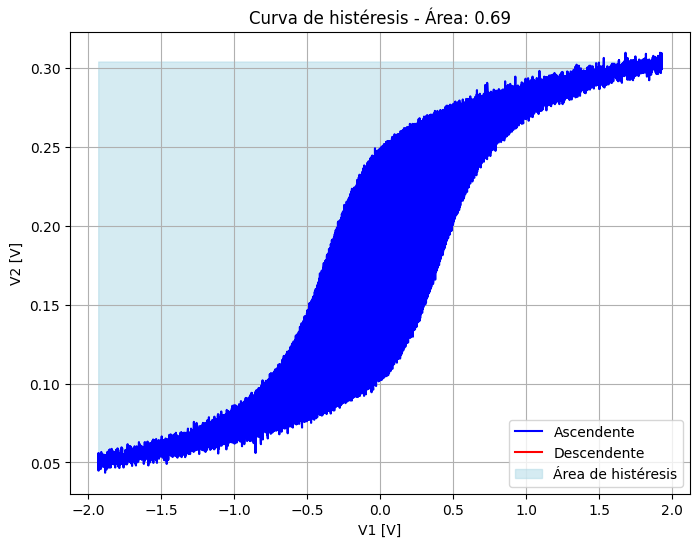

In [11]:
# Ordenar los datos por V1
V1_ordenado, V2_ordenado = zip(*sorted(zip(V1, V2)))

# Encontrar el punto máximo de V1 (pico de la curva)
pico = np.argmax(V1_ordenado)

# Dividir la curva en ascendente y descendente
V1_ascendente = V1_ordenado[:pico + 1]
V2_ascendente = V2_ordenado[:pico + 1]
V1_descendente = V1_ordenado[pico:]
V2_descendente = V2_ordenado[pico:]

# Calcular el área bajo cada parte de la curva
area_ascendente = np.trapz(V2_ascendente, V1_ascendente)
area_descendente = np.trapz(V2_descendente, V1_descendente)

# Calcular el área de histéresis (diferencia absoluta)
area_histeresis = abs(area_ascendente - area_descendente)

plt.figure(figsize=(8, 6))
plt.plot(V1_ascendente, V2_ascendente, label="Ascendente", color="blue")
plt.plot(V1_descendente, V2_descendente, label="Descendente", color="red")
plt.fill_between(V1_ascendente, V2_ascendente, V2_descendente[:len(V1_ascendente)], color="lightblue", alpha=0.5, label="Área de histéresis")
plt.xlabel("V1 [V]")
plt.ylabel("V2 [V]")
plt.title(f"Curva de histéresis - Área: {area_histeresis:.2f}")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
len(V1)

4230

### método simpson


In [12]:
for i in range(len(datos_numerados)):
    plt.figure(figsize=(6, 4))

    # Graficar V1 vs índice para verificar si los datos están ordenados
    plt.plot(datos_numerados[i]["Tiempo"], datos_numerados[i]["V1"], label="V1", alpha=0.7)
    plt.plot(datos_numerados[i]["Tiempo"], datos_numerados[i]["V2"], label="V2", alpha=0.7)

    plt.xlabel("Tiempo [s]")
    plt.ylabel("Voltaje [V]")
    plt.title(f"Verificación de datos - Archivo {i}")
    plt.legend()
    plt.grid(True)
    plt.show()

# el archivo 64 se ve muy mal ( no usar ), y el 68 tmb

Output hidden; open in https://colab.research.google.com to view.

In [13]:
for i in range(len(datos_numerados)):
    df = pd.DataFrame(datos_numerados[i])
    df_sorted = df.sort_values(by="Tiempo")  # Ordenar por tiempo
    datos_numerados[i] = df_sorted.to_dict(orient="list")  # Guardar de nuevo en el diccionario


In [14]:
# filtro para reducir el ruido

def suavizar(datos, ventana=5):
    return np.convolve(datos, np.ones(ventana)/ventana, mode='valid')

for i in range(len(datos_numerados)):
    datos_numerados[i]["V1_suav"] = suavizar(datos_numerados[i]["V1"])
    datos_numerados[i]["V2_suav"] = suavizar(datos_numerados[i]["V2"])


In [17]:
# intento 1

for i in range(len(datos_numerados)):
    if i == 64:  # Ignorar el archivo 64
        continue

    V1 = np.array(datos_numerados[i]["V1_suav"])  # Usar datos suavizados
    V2 = np.array(datos_numerados[i]["V2_suav"])

    # Separar ramas ascendente y descendente asegurando igualdad de tamaño
    mitad = min(len(V1) // 2, len(V2) // 2)  # Tomar el mínimo para evitar desajustes
    V1_asc, V2_asc = V1[:mitad], V2[:mitad]
    V1_desc, V2_desc = V1[mitad:mitad + len(V2_asc)], V2[mitad:mitad + len(V2_asc)]

    # Calcular el área con la regla de Simpson usando argumentos nombrados
    area = simpson(y=V2, x=V1)
    print(f"Área de histéresis (Archivo {i}): {abs(area)}")

    # Graficar la curva con el área coloreada
    plt.figure(figsize=(6, 4))
    plt.plot(V1, V2, 'k-', label="Curva de histéresis")

    # Colorear el área asegurando tamaños iguales
    plt.fill_betweenx(V2_asc, V1_asc, V1_desc, color='skyblue', alpha=0.5)

    # Configuración del gráfico
    plt.xlabel("V1 [V]")
    plt.ylabel("V2 [V]")
    plt.title(f"Histeresis - Archivo {i}")
    plt.legend()
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [20]:
# intento 2
for i in range(len(datos_numerados)):
    if i == 64:  # Ignorar el archivo 64
        continue

    V1 = np.array(datos_numerados[i]["V1_suav"])  # Usar datos suavizados
    V2 = np.array(datos_numerados[i]["V2_suav"])

    # Encontrar el punto de inversión de la curva (punto de histéresis máxima)
    idx_max = np.argmax(V1)  # Índice donde V1 es máximo
    V1_asc, V2_asc = V1[:idx_max], V2[:idx_max]
    V1_desc, V2_desc = V1[idx_max:], V2[idx_max:]

    # Interpolar la rama descendente para que coincida con la ascendente
    interp_desc = interp1d(V1_desc, V2_desc, kind='linear', bounds_error=False, fill_value="extrapolate")
    V2_desc_interp = interp_desc(V1_asc)  # Interpolamos la rama descendente en función de V1_asc

    # Calcular el área con la regla de Simpson
    area = simpson(y=np.abs(V2_asc - V2_desc_interp), x=V1_asc)
    print(f"Área de histéresis (Archivo {i}): {abs(area)}")

    # Graficar la curva con el área coloreada
    plt.figure(figsize=(6, 4))
    plt.plot(V1, V2, 'k-', label="Curva de histéresis")

    # Colorear correctamente el área entre las dos ramas
    plt.fill_betweenx(V2_asc, V1_asc, interp_desc(V2_asc), color='skyblue', alpha=0.5)

    # Configuración del gráfico
    plt.xlabel("V1 [V]")
    plt.ylabel("V2 [V]")
    plt.title(f"Histeresis - Archivo {i}")
    plt.legend()
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [26]:
# intento 3

for i in range(len(datos_numerados)):
    if i == 64:  # Ignorar archivos problemáticos si es necesario
        continue

    V1 = np.array(datos_numerados[i]["V1_suav"])
    V2 = np.array(datos_numerados[i]["V2_suav"])

    # Verificar NaN
    if np.any(np.isnan(V1)) or np.any(np.isnan(V2)):
        print(f"Archivo {i} tiene NaN en los datos. Se omite.")
        continue

    # Verificar longitudes
    if len(V1) != len(V2):
        print(f"Archivo {i} tiene longitudes desiguales: V1={len(V1)}, V2={len(V2)}. Se omite.")
        continue

    # Verificar si hay al menos 3 puntos para ajustar un spline cúbico
    if len(V1) < 3:
        print(f"Archivo {i} tiene muy pocos puntos ({len(V1)}). Se omite.")
        continue

    try:
        # Ajustar un spline 2D a toda la curva (sin separar ramas)
        tck, u = splprep([V1, V2], s=0.1)  # Ajuste con suavizado más alto
        V1_smooth, V2_smooth = splev(np.linspace(0, 1, 500), tck)  # Evaluar en malla uniforme

        # Calcular el área con la regla de Simpson
        area = simpson(y=np.abs(V2_smooth), x=V1_smooth)
        print(f"Área de histéresis (Archivo {i}): {abs(area)}")

        # Graficar la curva suavizada y el área de histéresis
        plt.figure(figsize=(6, 4))
        plt.plot(V1_smooth, V2_smooth, 'k-', label="Curva de histéresis", zorder=3)

        # Rellenar el área dentro de la curva cerrada
        plt.fill(V1_smooth, V2_smooth, color='skyblue', alpha=0.5, zorder=2)

        # Configuración del gráfico
        plt.xlabel("V1 [V]")
        plt.ylabel("V2 [V]")
        plt.title(f"Histeresis - Archivo {i}")
        plt.legend()
        plt.grid(True)

        # Mostrar el gráfico
        plt.show()

    except Exception as e:
        print(f"Error en el archivo {i}: {e}")

# EU BASTANTE BIEN

Output hidden; open in https://colab.research.google.com to view.

In [27]:
# intento 4 + guardo los resultados

import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.interpolate import splprep, splev
from scipy.integrate import simpson
from scipy.signal import savgol_filter

In [34]:

resultados = []

for i in range(len(datos_numerados)):
    V1 = np.array(datos_numerados[i]["V1_suav"])
    V2 = np.array(datos_numerados[i]["V2_suav"])

    # Verificar si hay valores NaN o longitudes desiguales
    if np.any(np.isnan(V1)) or np.any(np.isnan(V2)) or len(V1) != len(V2):
        print(f"⚠️ Archivo {i} omitido: contiene NaN o longitudes desiguales.")
        continue

    # Verificar que haya suficientes puntos para interpolar
    if len(V1) < 3:
        print(f"⚠️ Archivo {i} omitido: menos de 3 puntos disponibles.")
        continue

    try:
        # Elegir el grado del spline según la cantidad de puntos
        k_value = min(3, len(V1) - 1)  # Evita errores "m > k must hold"

        # Ajustar un spline 2D con suavizado automático
        tck, u = splprep([V1, V2], s=0.1, k=k_value)
        V1_smooth, V2_smooth = splev(np.linspace(0, 1, 500), tck)

        # Calcular el área con la regla de Simpson
        area = simpson(y=np.abs(V2_smooth), x=V1_smooth)
        area = abs(area)  # Asegurar que sea positiva

        # Guardar el resultado
        resultados.append([i, area])
        print(f"✅ Área de histéresis (Archivo {i}): {area}")

        # Graficar la curva suavizada y el área de histéresis
        plt.figure(figsize=(6, 4))
        plt.plot(V1_smooth, V2_smooth, 'k-', label="Curva de histéresis", zorder=3)
        plt.fill(V1_smooth, V2_smooth, color='skyblue', alpha=0.5, zorder=2)

        # Configuración del gráfico
        plt.xlabel("V1 [V]")
        plt.ylabel("V2 [V]")
        plt.title(f"Histeresis - Archivo {i}")
        plt.legend()
        plt.grid(True)

        # Mostrar el gráfico
        plt.show()

    except Exception as e:
        print(f"❌ Error en el archivo {i}: {e}")



Output hidden; open in https://colab.research.google.com to view.

In [36]:
# Guardar todas las áreas en un archivo CSV
csv_filename = "areas_histeresis-simp.csv"
with open(csv_filename, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Archivo", "Área de histéresis"])
    writer.writerows(resultados)

print(f"CSV guardado exitosamente en {csv_filename}.")

CSV guardado exitosamente en areas_histeresis-simp.csv.


In [38]:
#filtro por las areas que se calcularon bien:

areas_bien_calculadas = [1, 5, 9, 10, 11, 16, 17, 20, 23, 24, 25, 27, 29, 33, 37, 38, 39, 45, 47, 51, 57, 58, 62, 65, 67, 70, 71, 76, 83, 91, 92, 94, 96, 97, 98, 104, 105, 106, 109, 112, 114, 115, 117, 118, 121, 123, 124, 125, 126, 127, 133, 134, 138, 141, 143, 144, 147, 151, 161, 169, 180, 181, 183, 192, 199, 202, 203, 212, 214, 221, 223, 230, 235, 237, 240, 250]
# malos = 184, 218

import csv

resultados_filtrados = [fila for fila in resultados if fila[0] in areas_bien_calculadas]

csv_filename = "areas_filtradas.csv"
with open(csv_filename, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Archivo", "Área de histéresis"])
    writer.writerows(resultados_filtrados)

print(f"\n📁 Resultados filtrados guardados en {csv_filename}.")


📁 Resultados filtrados guardados en areas_filtradas.csv.


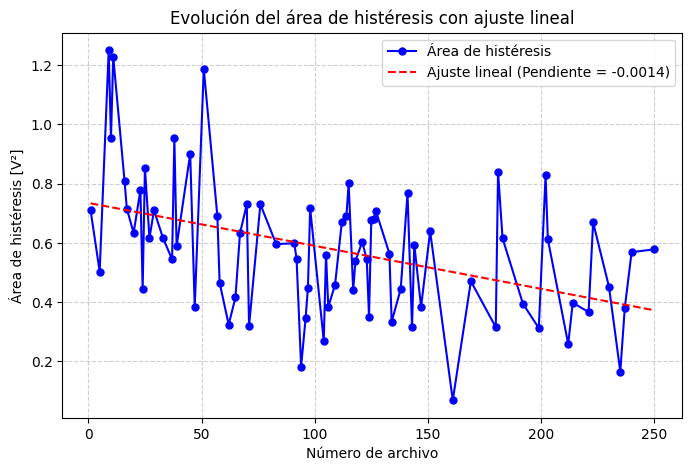

📈 Pendiente del ajuste lineal: -0.0014


In [41]:

areas_bien_calculadas = [1, 5, 9, 10, 11, 16, 17, 20, 23, 24, 25, 27, 29, 33, 37, 38, 39, 45, 47, 51, 57, 58, 62, 65, 67, 70, 71, 76, 83, 91, 92, 94, 96, 97, 98, 104, 105, 106, 109, 112, 114, 115, 117, 118, 121, 123, 124, 125, 126, 127, 133, 134, 138, 141, 143, 144, 147, 151, 161, 169, 180, 181, 183, 192, 199, 202, 203, 212, 214, 221, 223, 230, 235, 237, 240, 250]

# Extraer los valores de las áreas de histéresis filtradas
archivos = np.array([fila[0] for fila in resultados if fila[0] in areas_bien_calculadas], dtype=float)
areas = np.array([fila[1] for fila in resultados if fila[0] in areas_bien_calculadas], dtype=float)

pendiente, intercepto = np.polyfit(archivos, areas, 1)  # Grado 1 -> recta

areas_ajustadas = pendiente * archivos + intercepto  # Ahora 'archivos' es un array de numpy

plt.figure(figsize=(8, 5))
plt.plot(archivos, areas, 'o-', color='b', markersize=5, label="Área de histéresis")
plt.plot(archivos, areas_ajustadas, 'r--', label=f"Ajuste lineal (Pendiente = {pendiente:.4f})")

plt.xlabel("Número de archivo")
plt.ylabel("Área de histéresis [V²]")
plt.title("Evolución del área de histéresis con ajuste lineal")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print(f"📈 Pendiente del ajuste lineal: {pendiente:.4f}")
